![R-Kenntnis](../Pics/header.png "R-Kenntnis")

<div class="alert alert-block alert-info">

* **Titel:** Lösung zu den Übungen 05: Explorative Datenanalyse (Teil 1)
* **Autor:** Prof. Dr. Denis Royer
* **Datum:** 27.11.2022 (Version 2.1)

</div>

![Header_Data](../Pics/header_data.png "Data")

# BI - R-Kenntnis Lösung zu den Übungen 05: Explorative Datenanalyse (Teil 1)

<div class="alert alert-block alert-warning">
<b>Wichtig:</b> Bevor wir loslegen, müssen wir zunächst einmal ein paar vorbereitende Dinge erledigen:

* Die notwendigen Packages laden (bspw. `tidyverse`)

</div>


In [7]:
library(tidyverse)
library(DT)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Übung zu Boxplots

![Übungsaufgabe](../Pics/excercise.png "Übungsaufgabe")
 
Auf dem Campus haben wir 20 willkürlich ausgewählte Studierende nach ihrem Alter (in ganzen Jahren) befragt. Dabei ergab sich die folgende Verteilung:

![Daten für die Anlage des Boxplots.](../Pics/Box-Plot-Beispiel-01.png)

* Berechnen Sie mit ***R*** bitte folgende Werte:
    * den Median
    * den Interquartilabstand (IQR)
    * die folgenden Quartile: 1. und 3. Quartil
* Welche Werte bilden den oberen und unteren Zaun (Whiskers)?
* Erstellen Sie einen Boxplot für die Daten
    

<div class="alert alert-block alert-success">
<b>Lösungsansatz:</b></div>

In [1]:
# Vektor mit den Geburtsjahren anlegen
age <- c(24,22,23,32,28,62,31,36,22,22,21,24,22,26,26,28,31,22,21,26)
age

[1] 24 22 23 32 28 62 31 36 22 22 21 24 22 26 26 28 31 22 21 26

<div class="alert alert-block alert-danger">
<b>Wichtig:</b> 

***R*** (wie auch das Pendant von Excel) benutzt für die Bestimmung der Quantile eine Verteilungsfunktion, die die Werte für die Quantile Inierpoliert und nicht anhand der bestehenden Werte errechnet (also analog zum Median)!

Lässt man bei `quantile()` und `IQR()` den Parameter `type=` weg, so wird der Wert für die Quantile interpoliert und nicht analog zum Median anhand der Werte selbst errechnet (siehe LV0-06). Bei `type=5` wird der Wert so berechnet, wie ihn auch die `boxplot.stats()` Funktion berechnen wird (29,5 und nicht 28,75 wie bei `quantile()` oder `IQR()`. Mehr zum Parameter `type=` findet man hier: <https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/quantile>
    
**Hinweis:** Bei der `summary()` Funktion heißt der Parameter `quantile.type=` und nicht `type=`. 

</div>

In [2]:
# Im nächsten Schritt werden die Quantile berechnet.
age_q25 <- quantile(age, probs = .25,type=5)
age_med <- quantile(age, probs = .50,type=5)
age_q75 <- quantile(age, probs = .75,type=5)
age_iqr = IQR(age,type=5) # Alternative type = 5

In [3]:
# Alternative
quantile(age, type=5)

0%  25%  50%  75% 100% 
21.0 22.0 25.0 29.5 62.0

In [4]:
# Ausgabe der Daten als Tabelle (nur zur  besseren Darstellung):
df <- data.frame("1.Quart."= age_q25, "Median"= age_med, "3.Quart."= age_q75, "IQR"= age_iqr, row.names = NULL)
df

X1.Quart.,Median,X3.Quart.,IQR
<dbl>,<dbl>,<dbl>,<dbl>
22,25,29.5,7.5


In [5]:
# Ohne Angabe des type = Parameters wird die Verteilung 7 genutzt - sieh rote Box oben
quantile(age, probs = .75)

75% 
28.75

In [ ]:
# Die summary() Funktion ist ein anderer Weg, die Daten zu bekommen:
summary(age, quantile.type = 5)

Zuletzt gibt es die `boxplot()` Funktion, welche eine Boxplot als Grafik erstellt. Leitet man die Daten dieser Funktion in eine Variable um oder man nutzt die `boxplot.stats()` Funktion, so erhält man auch ALLE Daten, wie die "Zäune", Ausreißer, etc, die im Datenfeld (eine Matrix) `$stats` gespeichert sind.


$stats
[1] 21.0 22.0 25.0 29.5 36.0

$n
[1] 20

$conf
[1] 22.35026 27.64974

$out
[1] 62

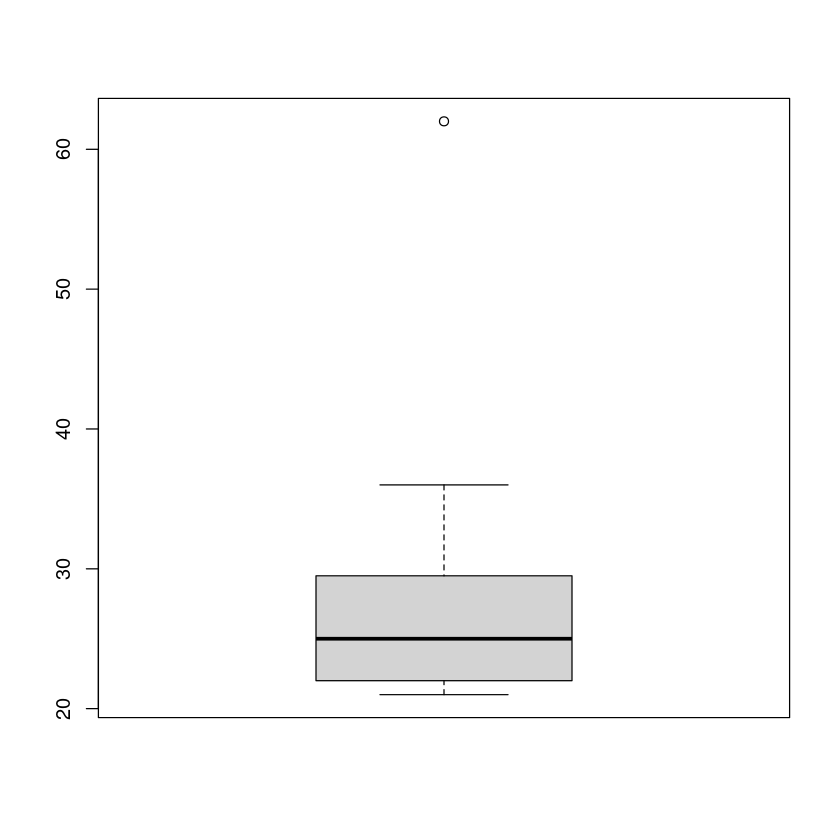

In [6]:
boxplot(age)
boxplot.stats(age)

## Übungen zu Multiplen Boxplots

![Übungsaufgabe](../Pics/excercise.png "Übungsaufgabe")

* Fassen Sie die Daten für die 3 Spezies für die Länge des Kronblatts tabellarisch zusammen und berechnen Sie in der Tabelle die Varianz, die Standardabweichung und den Mittelwert.
* Erstellen Sie folgende 2 Boxplots für die 3 Schwertlilien Spezies aus dem `iris` Datensatz:
   * Länge des Kelchblatts 
   * Breite des Kelchblatts

***Bitte beachten Sie:*** Der Aufruf der Boxplot-Funktion unterscheidet sich ein wenig von den bisher betrachteten Funktionen. Sie erwartet ein Objekt der Klasse `formular` als Argument. Ein *formula*-Objekt wird nach folgendem Schema definiert: **`numerische Variable ~ Gruppierungsvariablen`**.

<div class="alert alert-block alert-success">
<b>Lösungsansatz Zusammenfassung der Daten:</b></div>

Für die Zusammenfassung der Daten wird wieder auf den Pipe Syntax zurückgegriffen, um die Daten aus dem `iris` Datensatz für die Ausgabe anzupassen:

In [8]:
iris_data.df <- iris %>%
  group_by(Species) %>%
  summarise(
    `Anzahl Spezies (N)` = n(),
    `Average petal.length (mean)` = mean(Petal.Length),
    `Standard Abweichung petal.length (sd)` = sd(Petal.Length),
    `Varianz petal.length (var)` = var(Petal.Length)
  ) 

In [9]:
# Ausgabe der Daten
DT::datatable(iris_data.df)

HTML widgets cannot be represented in plain text (need html)

<div class="alert alert-block alert-success">
<b>Lösungsansatz Multiple Boxplots:</b></div>

Multiple Boxplots lassen sich folgendermaßen darstellen:

Als erstes erstellen wir ein formular Objekt, dass die Daten für
den Boxplot eingrenzt. Dies läss sich wie folgt lesen:

* Nehme die Daten aus `iris$Sepal.Length` **UND**
* gruppiere diese nach `iris$Species`.

Dies funktioniert bei fast allen Plot-Funktionen in R!

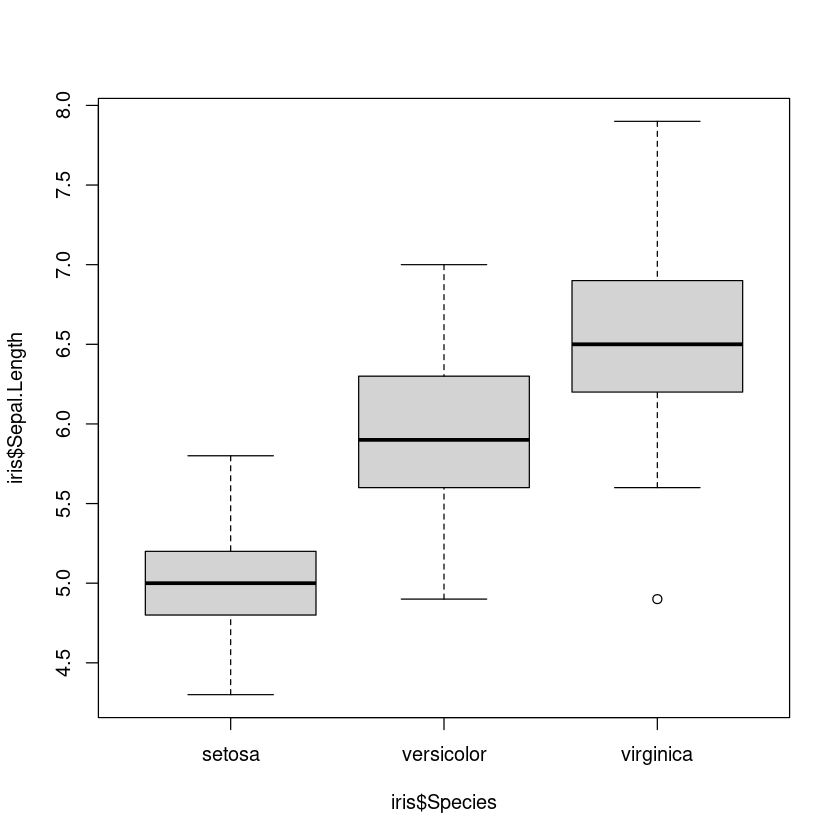

In [10]:
formel <- iris$Sepal.Length ~ iris$Species
# Alternativ kann der Befehl auch so geschrieben werden:
# boxplot(iris$Sepal.Length ~ iris$Species)
boxplot(formel)

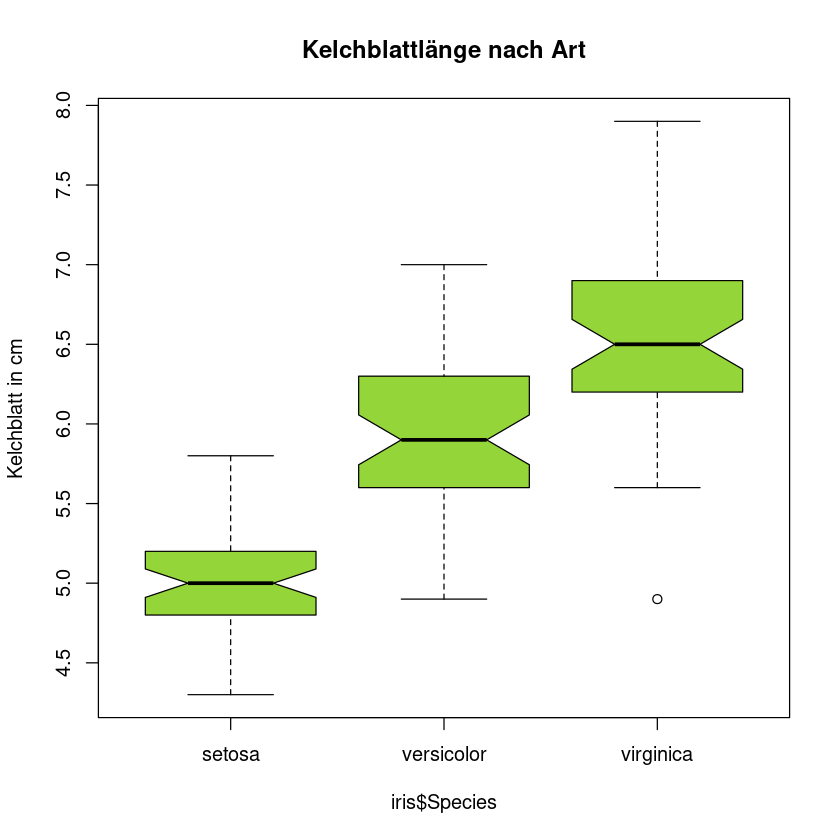

In [11]:
# Eine etwas versiertere und hübschere Darstellung:
boxplot(formel, range=1.5,
       width=NULL, 
       varwidth=TRUE,
       notch=TRUE, 
       outline=TRUE, 
       boxwex=0.8, 
       staplewex=0.5, 
       border="black", 
       col="#94d639", 
       horizintal=FALSE, 
       add=FALSE, 
       at=NULL,
       ylab="Kelchblatt in cm", 
       main="Kelchblattlänge nach Art")

## Übungen zum Anscombe-Quartett

![Übungsaufgabe](../Pics/excercise.png "Übungsaufgabe")

Analysieren Sie das Anscombe-Quartett mit den Mitteln der Explorativen Datenanalyse:
​
* Bestimmen Sie die Mittelwerte, Varianz und Standardabweichung für die vier Wertepaare. Was fällt Ihnen auf?
* Plotten die die vier Wertepaare (x,y). Was fällt Ihnen auf?
* Bestimmen Sie für alle 4 Wertepaare das Modell der Regressionsgraden.
* Fügen Sie die Regressionsgraden in den existierenden Plots ein.
* Was fällt Ihnen bei den Parametern der Regressionsgraden auf?
* ***Was leiten Sie übergreifend aus den vorherigen Beobachtungen ab?***

<div class="alert alert-block alert-success">
<b>Lösungsansatz:</b></div>

Wie eingangs gesagt, besteht das Anscombe-Quartett aus vier Mengen von Datenpunkten, die nahezu identische einfache statistische Eigenschaften haben, aber aufgetragen sehr verschieden aussehen. Jede dieser vier Mengen besteht aus elf (x,y)-Punkten.

In [12]:
# Laden der Daten aus dem Anscombe Datensatz
data("anscombe")
# Anzeige der Zusammenfassung der Daten
summary(anscombe)

       x1             x2             x3             x4           y1        
 Min.   : 4.0   Min.   : 4.0   Min.   : 4.0   Min.   : 8   Min.   : 4.260  
 1st Qu.: 6.5   1st Qu.: 6.5   1st Qu.: 6.5   1st Qu.: 8   1st Qu.: 6.315  
 Median : 9.0   Median : 9.0   Median : 9.0   Median : 8   Median : 7.580  
 Mean   : 9.0   Mean   : 9.0   Mean   : 9.0   Mean   : 9   Mean   : 7.501  
 3rd Qu.:11.5   3rd Qu.:11.5   3rd Qu.:11.5   3rd Qu.: 8   3rd Qu.: 8.570  
 Max.   :14.0   Max.   :14.0   Max.   :14.0   Max.   :19   Max.   :10.840  
       y2              y3              y4        
 Min.   :3.100   Min.   : 5.39   Min.   : 5.250  
 1st Qu.:6.695   1st Qu.: 6.25   1st Qu.: 6.170  
 Median :8.140   Median : 7.11   Median : 7.040  
 Mean   :7.501   Mean   : 7.50   Mean   : 7.501  
 3rd Qu.:8.950   3rd Qu.: 7.98   3rd Qu.: 8.190  
 Max.   :9.260   Max.   :12.74   Max.   :12.500  

In [13]:
# Anwenden der Funktionen mean, sd und var auf die Daten
# im Anscombe Datensatz (x und y Datensätze): 
sapply(anscombe, mean)

x1       x2       x3       x4       y1       y2       y3       y4 
9.000000 9.000000 9.000000 9.000000 7.500909 7.500909 7.500000 7.500909

In [14]:
sapply(anscombe, sd)

x1       x2       x3       x4       y1       y2       y3       y4 
3.316625 3.316625 3.316625 3.316625 2.031568 2.031657 2.030424 2.030579

In [15]:
sapply(anscombe, var)

x1        x2        x3        x4        y1        y2        y3        y4 
11.000000 11.000000 11.000000 11.000000  4.127269  4.127629  4.122620  4.123249


Call:
lm(formula = anscombe$y1 ~ anscombe$x1)

Coefficients:
(Intercept)  anscombe$x1  
     3.0001       0.5001  


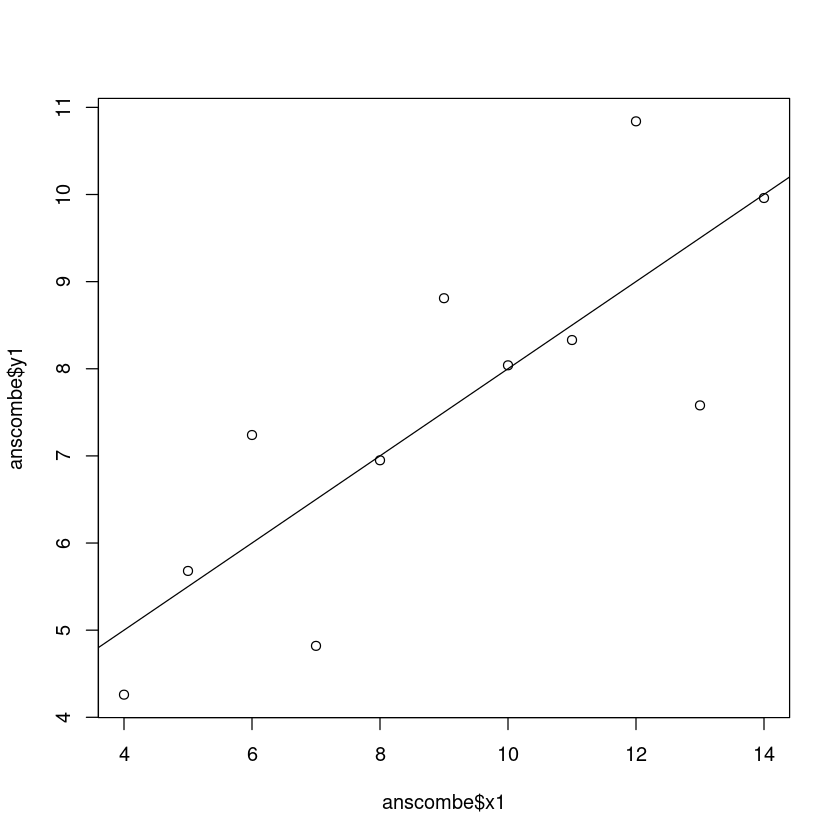


Call:
lm(formula = anscombe$y2 ~ anscombe$x2)

Coefficients:
(Intercept)  anscombe$x2  
      3.001        0.500  


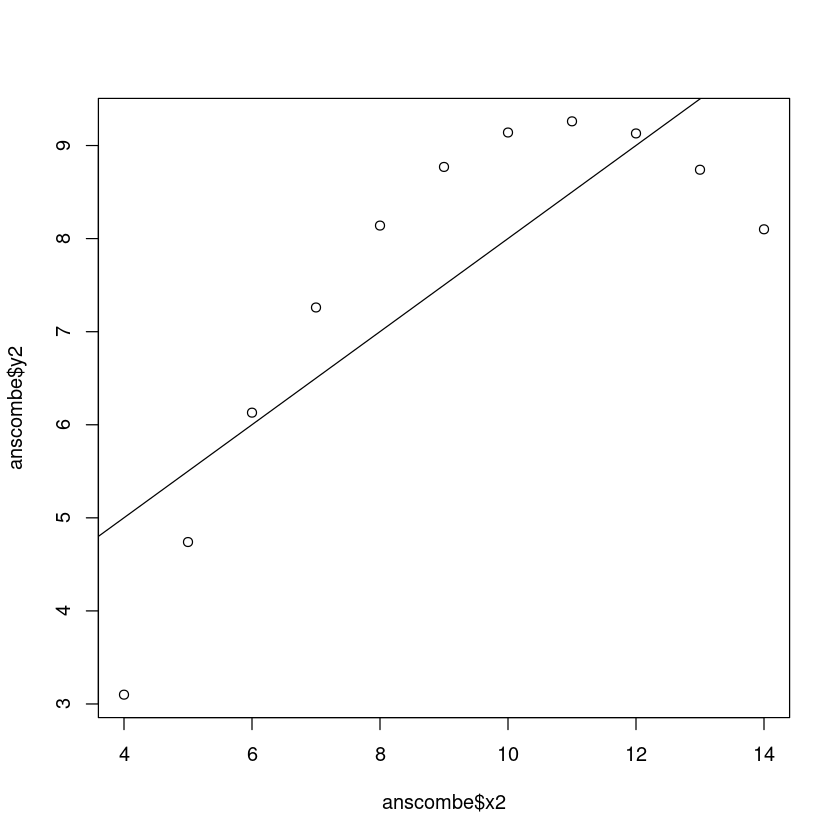


Call:
lm(formula = anscombe$y3 ~ anscombe$x3)

Coefficients:
(Intercept)  anscombe$x3  
     3.0025       0.4997  


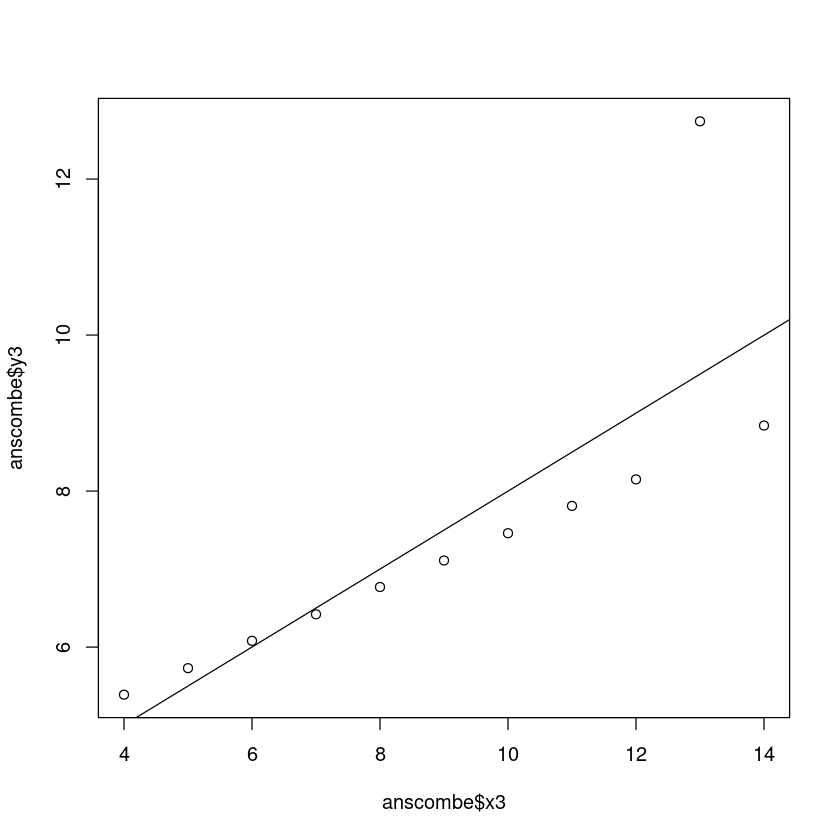


Call:
lm(formula = anscombe$y4 ~ anscombe$x4)

Coefficients:
(Intercept)  anscombe$x4  
     3.0017       0.4999  


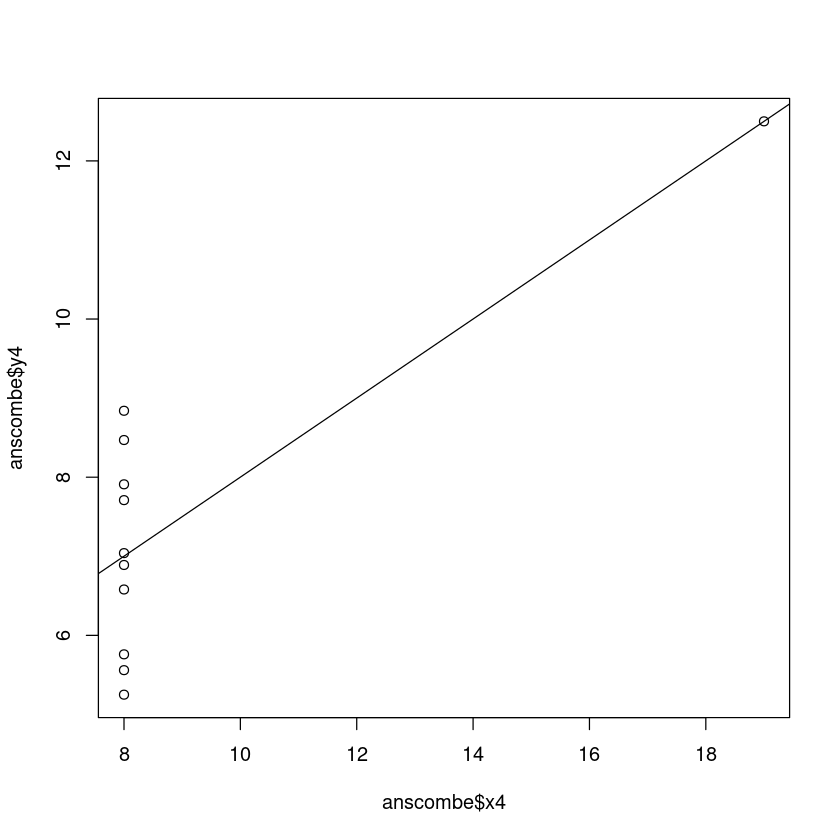

In [16]:
# Ausgabe der Daten als Plot
plot(anscombe$x1, anscombe$y1)
# Erstellen einer Regressionslinie (als Modell)
lm(anscombe$y1 ~ anscombe$x1)
# Einfügen der Regressionslinie in den aktuellen Plot
abline(lm(anscombe$y1 ~ anscombe$x1))

# Analog erfolgt dies für die übrigen Daten:
plot(anscombe$x2, anscombe$y2)
lm(anscombe$y2 ~ anscombe$x2)
abline(lm(anscombe$y2 ~ anscombe$x2))

plot(anscombe$x3, anscombe$y3)
lm(anscombe$y3 ~ anscombe$x3)
abline(lm(anscombe$y3 ~ anscombe$x3))

plot(anscombe$x4, anscombe$y4)
lm(anscombe$y4 ~ anscombe$x4)
abline(lm(anscombe$y4 ~ anscombe$x4))

Weiter Hinweise zu Formatierung mehrerer Plots gibt es hier:

* <https://github.com/seandolinar/stats.seandolinar.com-Tutorials/blob/master/correlation-introduction.R>
* <https://stats.seandolinar.com/introduction-to-correlation-with-r-anscombes-quartet/>

### Aufbereitung der Anscombe Daten mit ggplot2

In [17]:
#Bibliotheken laden
library(ggplot2)
library(grid)
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [18]:
# Korrelation der 4 Datensätze berechnen
cor1 <- format(cor(anscombe$x1, anscombe$y1), digits=4)
cor2 <- format(cor(anscombe$x2, anscombe$y2), digits=4)
cor3 <- format(cor(anscombe$x3, anscombe$y3), digits=4)
cor4 <- format(cor(anscombe$x4, anscombe$y4), digits=4)

In [19]:
#define the OLS regression
line1 <- lm(y1 ~ x1, data=anscombe)
line2 <- lm(y2 ~ x2, data=anscombe)
line3 <- lm(y3 ~ x3, data=anscombe)
line4 <- lm(y4 ~ x4, data=anscombe)

In [20]:
circle.size = 5
colors = list('red', '#0066CC', '#4BB14B', '#FCE638')

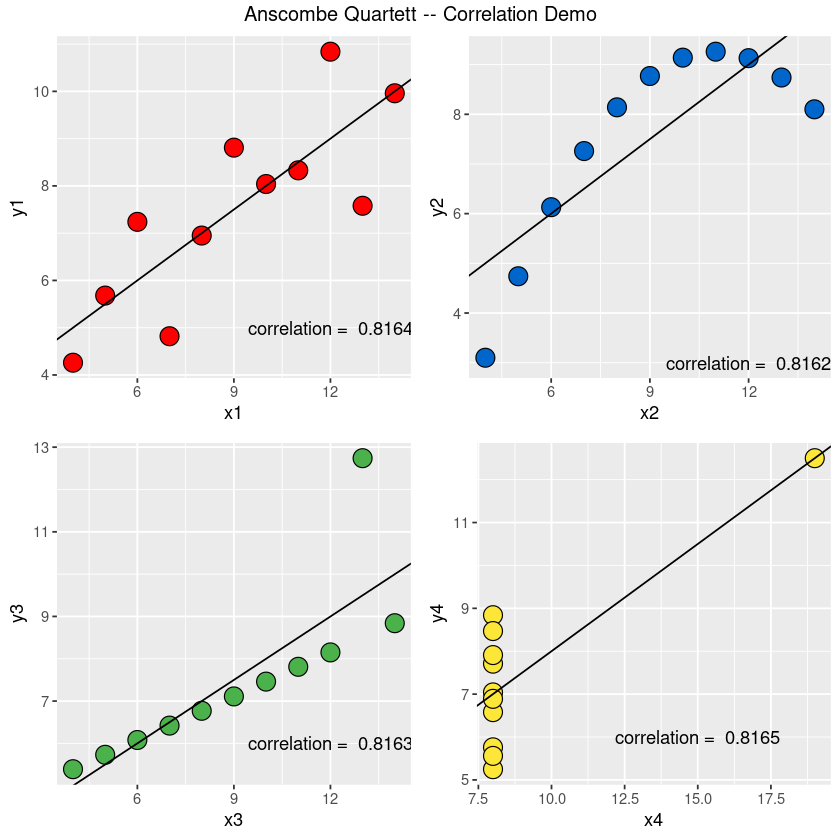

In [21]:
#plot1
plot1 <- ggplot(anscombe, aes(x=x1, y=y1)) + geom_point(size=circle.size, pch=21, fill=colors[[1]]) +
  geom_abline(intercept=line1$coefficients[1], slope=line1$coefficients[2]) +
  annotate("text", x = 12, y = 5, label = paste("correlation = ", cor1))

#plot2
plot2 <- ggplot(anscombe, aes(x=x2, y=y2)) + geom_point(size=circle.size, pch=21, fill=colors[[2]]) +
  geom_abline(intercept=line2$coefficients[1], slope=line2$coefficients[2]) +
  annotate("text", x = 12, y = 3, label = paste("correlation = ", cor2))

#plot3
plot3 <- ggplot(anscombe, aes(x=x3, y=y3)) + geom_point(size=circle.size, pch=21, fill=colors[[3]]) +
  geom_abline(intercept=line3$coefficients[1], slope=line3$coefficients[2]) +
  annotate("text", x = 12, y = 6, label = paste("correlation = ", cor3))

#plot4
plot4 <- ggplot(anscombe, aes(x=x4, y=y4)) + geom_point(size=circle.size, pch=21, fill=colors[[4]]) +
  geom_abline(intercept=line4$coefficients[1], slope=line4$coefficients[2]) +
  annotate("text", x = 15, y = 6, label = paste("correlation = ", cor4))

# ALle 4 Plots in einer 2x2 Martrix darstellen
# weil es so hübscher ist
grid.arrange(plot1, plot2, plot3, plot4, top='Anscombe Quartett -- Correlation Demo')

### Abgeleitete Beobachtungen zum Anscombe Quartett

**Folgende Dinge lassen sich beobachten:**

* Der Mittelwert von x ist in jedem Fall gleich 9 (exakt)
* Die Varianz von x ist in jedem Fall gleich 11 (exakt)
* Der Mittelwert von y ist in jedem Fall 7,50 (auf 2 Stellen genau)
* Die Varianz von y ist in jedem Fall gleich 4,122 oder 4,127 (auf 3 Stellen genau)
* Die Korrelation zwischen x und y ist in jedem Fall gleich 0,816 (auf 3 Stellen genau)
* Die lineare Regression ist in jedem Fall $y = 3,00 + 0,500x$ (auf 2 bzw. 3 Stellen genau)

<div class="alert alert-block alert-info">
<b>HINWEIS:</b> Das Anscombe-Quartett wird benutzt, um die Bedeutung der graphischen Datenanalyse herauszustellen, die erfolgen sollte, bevor man aufgrund einer Annahme über die statistischen Eigenschaften der Daten mit der Analyse beginnt. Weiterhin zeigt es, dass einfache statistische Maßzahlen zur Beschreibung der Daten nicht immer ausreichen.</div>
